In [1]:
from MDP import MountainCar, CartPole
from RLAlgorithms import ESGNStepSARSA, TrueOnlineSARSALambda
import matplotlib.pyplot as plt
import numpy as np

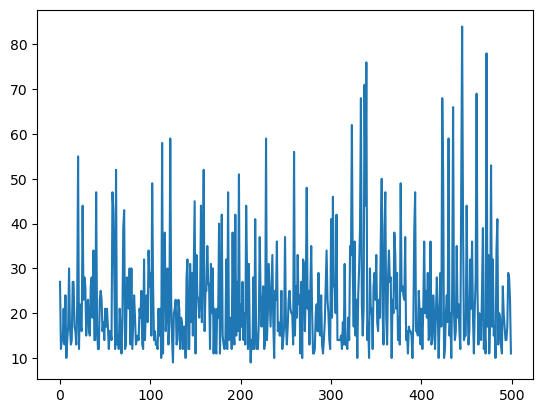

In [4]:
mc = CartPole()
# print(mc.s)
alg = ESGNStepSARSA(mc, M=10, n=2)

Gs = alg.run()

plt.clf()
plt.plot(range(len(Gs)), Gs)

lambda: 0.6


100%|██████████| 2000/2000 [01:52<00:00, 17.71it/s]


lambda: 0.7


100%|██████████| 2000/2000 [01:57<00:00, 17.01it/s]


lambda: 0.8


100%|██████████| 2000/2000 [01:45<00:00, 19.02it/s]


lambda: 0.9


100%|██████████| 2000/2000 [01:05<00:00, 30.38it/s]


lambda: 0.92


100%|██████████| 2000/2000 [00:47<00:00, 42.10it/s]


lambda: 0.95


100%|██████████| 2000/2000 [00:22<00:00, 89.03it/s] 


lambda: 0.99


100%|██████████| 2000/2000 [00:11<00:00, 178.46it/s]


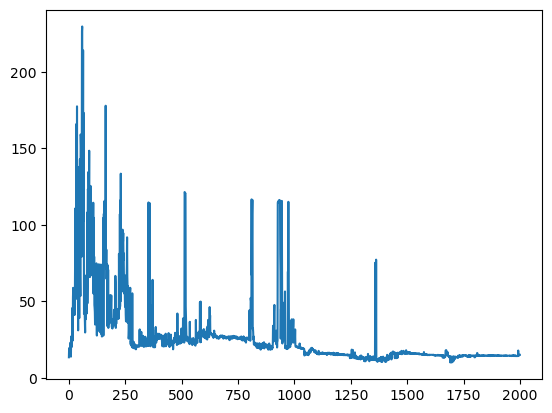

In [2]:
num_trials = 5
cp = CartPole()


for approach in ['epsilon-greedy', 'softmax'][1:]:
    for t in [0.6, 0.7, 0.8, 0.9, 0.92, 0.95, 0.99]:
        print('lambda:',t)
        alg = TrueOnlineSARSALambda(cp, M=10, tdr=t, approach=approach)
        Gs = np.zeros(alg.num_episodes)

        for _ in range(num_trials):
            alg.reset()
            Gs += np.array(alg.run())

        Gs /= num_trials

        plt.clf()
        plt.plot(range(len(Gs)), Gs)
        plt.savefig(f'experiments/SARSALambda-CartPole-Lambda-{t}-{approach}.png', facecolor='white')

lambda: 0.5


100%|██████████| 2000/2000 [00:52<00:00, 38.05it/s]


lambda: 0.4


100%|██████████| 2000/2000 [00:32<00:00, 61.82it/s]


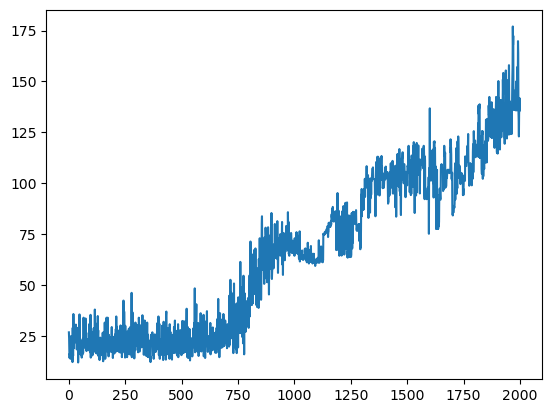

In [2]:
num_trials = 5
cp = CartPole()

ts = np.array([0.4, 0.5])

for t in np.flip(ts):
    print('lambda:',t)
    alg = TrueOnlineSARSALambda(cp, M=10, tdr=t)
    Gs = np.zeros(alg.num_episodes)

    for _ in range(num_trials):
        alg.reset()
        Gs += np.array(alg.run())

    Gs /= num_trials

    plt.clf()
    plt.plot(range(len(Gs)), Gs)
    plt.savefig(f'experiments/SARSALambda-CartPole-Lambda-{t}-epsilon-greedy.png', facecolor='white')

In [3]:
mc = MountainCar()
mc.run_episode(lambda x: -1 if x[1] < 0 else 1)

-8.99998283846267